Inertia:  1088.6330385116921
Centroids are:  [[ 1.66765207e-02  5.10190127e-01  5.62599391e-01  1.36874032e-01
   3.95348072e-01  7.28743399e-02  1.00000000e+00  2.32438479e-01
   4.97762864e-02]
 [ 1.94372844e-02  4.64495338e-01  5.80119716e-01  1.69093930e-01
   4.18641154e-01  3.49817182e-02 -2.44249065e-15  2.45235070e-01
   2.77001271e-01]]
Clusters  2
Result: 27 out of 2575 samples were correctly labeled.
Accuracy score: 0.01
Number of occurrences:  Counter({0: 1788, 1: 787})


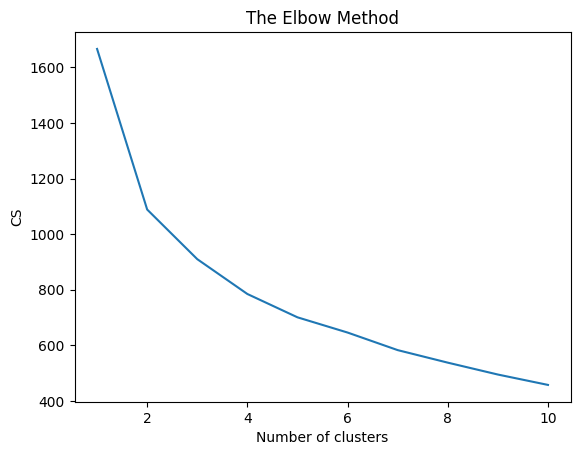




Inertia:  910.0987250187056
Centroids are:  [[ 1.69993554e-02  5.07044118e-01  5.63967465e-01  1.38935422e-01
   3.96288474e-01  7.12664112e-02  1.00000000e+00  2.29782225e-01
   6.38378239e-16]
 [ 1.88827517e-02  4.72235385e-01  5.90234400e-01  1.70023884e-01
   4.09076812e-01  3.86583456e-02 -8.88178420e-16  2.60105448e-01
   3.05311332e-16]
 [ 1.78780828e-02  4.80807452e-01  5.48722578e-01  1.46621565e-01
   4.24410807e-01  4.80511423e-02  2.89902280e-01  2.28664495e-01
   1.00000000e+00]]
Clusters  3
Result: 121 out of 2575 samples were correctly labeled.
Accuracy score: 0.05
Number of occurrences:  Counter({0: 1699, 1: 569, 2: 307})



Inertia:  784.8311366428931
Centroids are:  [[ 2.97595317e-02  2.82535651e-01  5.80941707e-01  1.30561945e-01
   3.78737542e-01  6.83360830e-02  1.00000000e+00  1.12513843e-01
   5.96744876e-16]
 [ 1.78780828e-02  4.80807452e-01  5.48722578e-01  1.46621565e-01
   4.24410807e-01  4.80511423e-02  2.89902280e-01  2.28664495e-01
   1.00000000e+00]
 [

In [3]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans

data = '../lab2/Billionaires Statistics Dataset.csv'
df = pd.read_csv(data)


for column in df:
    if df[column].dtype == 'object':
        df[column] = pd.factorize(df[column])[0]

df.dropna(inplace=True)

df.drop('industries', axis=1, inplace=True)
df.drop('status', axis=1, inplace=True)
df.drop('life_expectancy_country', axis=1, inplace=True)
df.drop('birthDay', axis=1, inplace=True)

X = df

y = df['country']

le = LabelEncoder()

X['country'] = le.fit_transform(X['country'])

y = le.transform(y)

cols = X.columns

ms = MinMaxScaler()

X = ms.fit_transform(X)

X = pd.DataFrame(X, columns=[cols])

kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)

kmeans.fit(X)

labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Inertia: ", kmeans.inertia_)
print("Centroids are: ", kmeans.cluster_centers_)
print("Clusters ", 2)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'.format(correct_labels / float(y.size)))
print("Number of occurrences: ", Counter(labels))

cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)

kmeans.fit(X)

labels = kmeans.labels_

correct_labels = sum(y == labels)
print("\n\n")
print("Inertia: ", kmeans.inertia_)
print("Centroids are: ", kmeans.cluster_centers_)
print("Clusters ", 3)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'.format(correct_labels / float(y.size)))
print("Number of occurrences: ", Counter(labels))

kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)

kmeans.fit(X)

labels = kmeans.labels_

correct_labels = sum(y == labels)
print("\n\n")
print("Inertia: ", kmeans.inertia_)
print("Centroids are: ", kmeans.cluster_centers_)
print("Clusters ", 4)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'.format(correct_labels / float(y.size)))
print("Number of occurrences: ", Counter(labels))